In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.manifold import MDS
from sklearn.cluster import AgglomerativeClustering

import helper

/Users/csengepetak/Documents/GitHub/CA_GRN2/old_notebooks/helper.py:61: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = windows.dot(grn)
/Users/csengepetak/Documents/GitHub/CA_GRN2/old_notebooks/helper.py:82: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = gene_vals.dot(internal_grn)


In [3]:
# Use Seaborn to get the "rocket" colormap
rocket_cmap = sns.color_palette("rocket", as_cmap=True)

def imshow_ca(grid, ax):
    # im = ax.imshow(grid, cmap="magma")
    im = ax.imshow(grid, cmap=rocket_cmap,interpolation="nearest")

    # Minor ticks
    ax.set_xticks(np.arange(-0.5, grid.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, grid.shape[0], 1), minor=True)

    # And a corresponding grid
    ax.grid(which="minor", alpha=0.3)
    for tick in ax.xaxis.get_minor_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)
    for tick in ax.xaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)
    for tick in ax.yaxis.get_minor_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)
    for tick in ax.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)

    return im

# Exploring CA rules

In [4]:
num_cells=22

seed_ints=[]
for _ in range(30):
    t=np.zeros(num_cells).astype(int)
    t[:int(num_cells/2)]=1
    np.random.shuffle(t)
    binary_string = ''.join(t.astype(str))
    seed_ints.append(int(binary_string, 2))
    
# Conclusion: they are quite similar to each other, starting from random seed with 50% 1, 50% 0

In [12]:
np.arange(0,256,2) #ARE THE VALID RULES, odd rules have 000->1
    
    

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232,
       234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254])

In [6]:
dev_steps=23
ncols = 3
nrows = 2
scale = 3

seed_ints=[4147842,1238860,2481300,69904,149796,1024]

valid_rules=np.arange(0,256,2)

rules=[]
for rule in valid_rules:#[54,102,94,150,90,30,50,254,62,110]:
    
    #print(rule)

    #fig, axs = plt.subplots(figsize=(ncols * scale, nrows * scale), ncols=ncols, nrows=nrows)
    #axs=axs.flatten()

    t_seeds=[]
    for idx,seed_int in enumerate(seed_ints):

        #print(seed_int)

        binary_string = bin(int(seed_int))[2:]
        binary_list = [int(digit) for digit in binary_string]
        start_pattern = np.array(binary_list)
        start_pattern=np.pad(start_pattern, (num_cells-len(start_pattern),0), 'constant', constant_values=(0))

        p=helper.rule2targets_wrapped_wstart(rule, dev_steps, num_cells, start_pattern)
        #axs[idx].imshow(p)
        t_seeds.append(p)
    #plt.show()
    rules.append(t_seeds)
    


In [7]:
rule_space=np.reshape(np.array(rules), (128,6*23*22))

128


/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


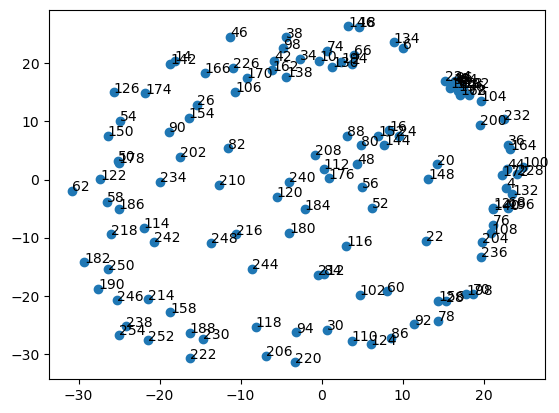

In [23]:
df = pd.DataFrame(rule_space)
print(len(df))

# Perform MDS transformation
mds = MDS(n_components=2)
mds_result = mds.fit_transform(df)

# Create scatter plot
plt.scatter(mds_result[:, 0], mds_result[:, 1])

for i, txt in enumerate(valid_rules[df.index]):
    plt.annotate(txt, (mds_result[i, 0], mds_result[i, 1]))

In [30]:
def get_agglo_2d(x,y,k):
  X = np.array(x).reshape(-1, 1)
  Y = np.array(y).reshape(-1, 1)

  agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')

  # Fit the model to the data
  agg_clustering.fit(np.concatenate((X, Y), axis=1))

  labels = agg_clustering.labels_

  return labels

In [37]:
NUM_CLUST=10
clusts=get_agglo_2d(mds_result[:, 0], mds_result[:, 1],NUM_CLUST)

0
yellow
[114 158 182 188 190 214 218 222 230 238 242 246 250 252 254]
1
green
[ 26  50  54  58  62  82  90 122 126 150 154 174 178 186 202 210 234]
2
purple
[ 16  20  24  48  52  56  80  88 112 120 144 148 152 176 180 184 208 240]
3
red
[  4  12  36  44  68 100 132 140 164 172 196 200 228 232]
4
blue
[ 60  84 102 116 212 216 244 248]
5
orange
[ 14  34  38  42  46  98 106 138 142 162 166 170 226]
6
cyan
[ 22  28  70  76  78  92 108 156 198 204 236]
7
magenta
[  0   8  32  40  64  72  96 104 128 136 160 168 192 224]
8
brown
[  2   6  10  18  66  74 130 134 146 194]
9
lime
[ 30  86  94 110 118 124 206 220]


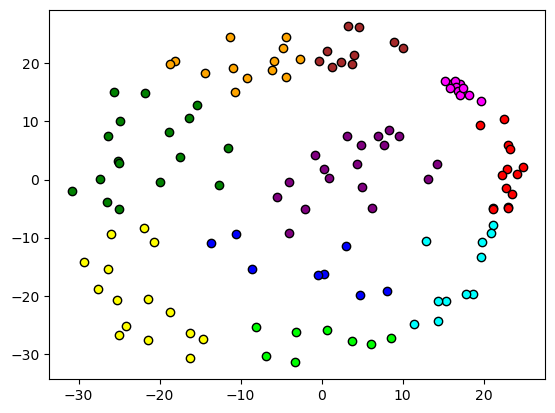

In [53]:
all_cols=["yellow","green","purple",'red', 'blue', 'orange', 'cyan', 'magenta', 'brown', 'lime']
p_colors= all_cols[:NUM_CLUST]
dim=np.array(list(zip(mds_result[:, 0],mds_result[:, 1])))
for c in range(NUM_CLUST):
    t=np.where(np.array(clusts) == c)[0]
    x=[i[0] for i in dim[t]]
    y=[i[1] for i in dim[t]]
    print(c)
    print(p_colors[c])
    print(valid_rules[t])
    plt.scatter(x,y,edgecolors="black",c=p_colors[c])

In [101]:
t=np.where(np.array(clusts) == 8)[0]
valid_rules[t]

array([  2,   6,  10,  18,  66,  74, 130, 134, 146, 194])

In [9]:
seed_ints

[3181182,
 3942611,
 2421923,
 1694290,
 2966167,
 962188,
 1852390,
 2787687,
 3190357,
 3704173,
 2124711,
 713619,
 2901223,
 3827466,
 4065587,
 755964,
 536427,
 2080970,
 1469864,
 2221351,
 894110,
 345835,
 3113754,
 822005,
 1188854,
 1489222,
 382310,
 466386,
 2386857,
 1930769]

83


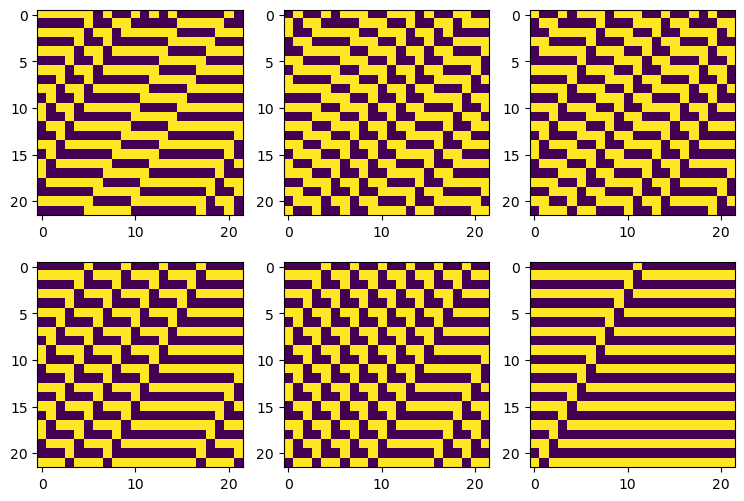

In [11]:
#sub_rules=valid_rules[t]
sub_rules=[83]#ori_rules#filtered_arr
scale=3
ncols = 3
nrows = 2
dev_steps = 22
seed_ints=[4147842,1238860,2481300,69904,149796,1024]
for rule in sub_rules:
    print(rule)
    fig, axs = plt.subplots(figsize=(ncols * scale, nrows * scale), ncols=ncols, nrows=nrows)
    axs=axs.flatten()
    for idx,seed_int in enumerate(seed_ints):

        #print(seed_int)

        binary_string = bin(int(seed_int))[2:]
        binary_list = [int(digit) for digit in binary_string]
        start_pattern = np.array(binary_list)
        start_pattern=np.pad(start_pattern, (num_cells-len(start_pattern),0), 'constant', constant_values=(0))

        p=helper.rule2targets_wrapped_wstart(rule, dev_steps, num_cells, start_pattern)
        axs[idx].imshow(p)
    plt.show()

In [131]:
valid_rules=np.arange(0,256,2)
t=np.where(np.array(clusts) == 7)[0]
empty=valid_rules[t]

boring=[252,250,238,222,246,178,186,202,234,248,244,216,116,84,28,76,92,108,156,204,236,2,6,10,66,74,130,134,194]

t=np.where(np.array(clusts) == 2)[0]
diagonal=valid_rules[t]

t=np.where(np.array(clusts) == 3)[0]
vertical=valid_rules[t]

t=np.where(np.array(clusts) == 5)[0]
diagonal2=valid_rules[t]

extra_boring=[58,114,188,190,198,230,242]

In [135]:
all_bad=np.concatenate([empty, boring, diagonal, vertical, diagonal2,extra_boring])

In [136]:
mask = np.isin(valid_rules, all_bad)
filtered_arr = valid_rules[~mask]
len(filtered_arr)


32

In [137]:
filtered_arr

array([ 18,  22,  26,  30,  50,  54,  60,  62,  70,  78,  82,  86,  90,
        94, 102, 110, 118, 122, 124, 126, 146, 150, 154, 158, 174, 182,
       206, 210, 212, 214, 218, 220])

In [138]:
ori_rules=[54,102,94,150,90,30,50,254,62,110]
for i in ori_rules:
    if i not in filtered_arr:
        print(i)
        print("no")

254
no


# Random GRNs

In [16]:
def set_up_pop(pop_size, num_cells, grn_size, rule, dev_steps, pop, seed_int):
    binary_string = bin(int(seed_int))[2:]
    binary_list = [int(digit) for digit in binary_string]
    start_pattern = np.array(binary_list)
    start_pattern=np.pad(start_pattern, (num_cells-len(start_pattern),0), 'constant', constant_values=(0))
    
    geneid=1
    start_gene_values = np.zeros((pop_size, int(num_cells * grn_size)))
    start_gene_values[:,geneid::grn_size] = start_pattern
    start_padded_gene_values = np.pad(start_gene_values, [(0,0),(1,1)], "wrap")
    start_padded_gene_values = np.float64(start_padded_gene_values)
    
    myinput=start_padded_gene_values

    #Creating target
    target = helper.rule2targets_wrapped_wstart(rule, L=dev_steps+1, N=num_cells, start_pattern=start_pattern)
    
    calc_phenos = helper.develop(myinput, pop, dev_steps, pop_size, grn_size, num_cells) #for all num_generations individuals in paralell
    calc_phenos = calc_phenos[:,:,1::grn_size]
    
    worst= -num_cells*dev_steps
    
    #Fitnesses for the two different environments
    calc_fitnesses = helper.fitness_function_ca(calc_phenos, target)
    calc_fitnesses=1-(calc_fitnesses/worst) #0-1 scaling

    return target, calc_phenos, calc_fitnesses

In [61]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def global_devel(seed, GRN):
    N = seed.shape[0]
    history = np.empty((N+1,N), dtype=seed.dtype)
    history[0] = seed
    for i in range(1,N+1):
        history[i] = sigmoid(GRN.dot(history[i-1]))
    return history

In [62]:
pop_size = 1000
grn_size = 22
num_cells = 22
dev_steps = 23

In [76]:
pop = np.random.randn(pop_size, grn_size+2, grn_size).astype(np.float64)

## Phenotypes

In [87]:
rule=1 #doesn't matter for pheno
seed_ints=[4147842,1238860,2481300,69904,149796,1024]
seed_int=1024

targets, phenos, calc_fitnesses = set_up_pop(pop_size, num_cells, grn_size, rule, dev_steps, pop, seed_int)

binary_string = bin(int(seed_int))[2:]
binary_list = [int(digit) for digit in binary_string]
start_pattern = np.array(binary_list)
seed=np.pad(start_pattern, (num_cells-len(start_pattern),0), 'constant', constant_values=(0))
seed=seed.astype(float)

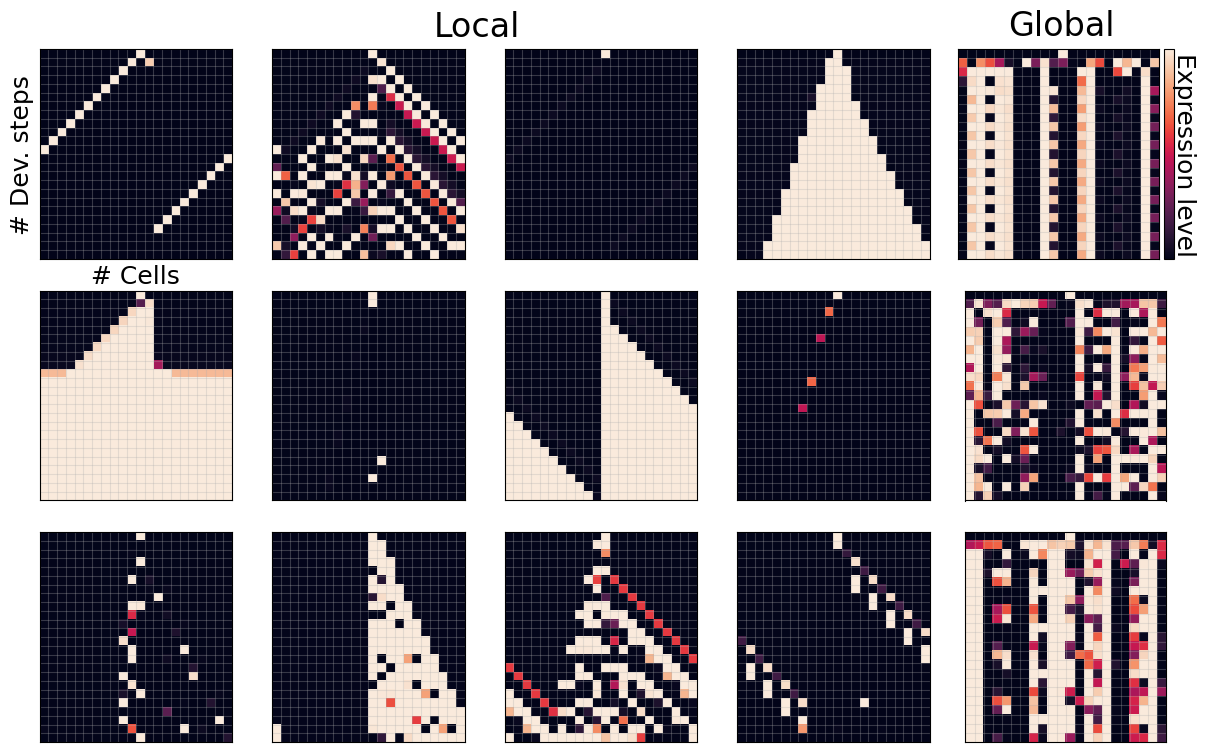

In [88]:
ncols = 5
nrows = 3
scale = 3
N=num_cells

fig, axs = plt.subplots(
    figsize=(ncols * scale, nrows * scale), ncols=ncols, nrows=nrows
)

l = 0
for i, ax in enumerate(axs.flatten()):

    if i % ncols == ncols - 1:
        GRN = np.random.randn(N, N) * 4
        pheno = global_devel(seed, GRN)
        im = imshow_ca(pheno, ax=ax)
        if i == ncols - 1:
            #ax.set_title("Global")
            ax.text(5, -2, 'Global', fontsize=24)
            # https://stackoverflow.com/questions/18195758/set-matplotlib-colorbar-size-to-match-graph
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            cbar = plt.colorbar(im, cax=cax, ticks=[])
            #cbar.ax.set_yticklabels(['0.0', '0.5', '1.0'])
            cbar.set_label("Expression level", rotation=270, labelpad=16, fontsize=18)
    elif i == 0:
        im = imshow_ca(phenos[l], ax=ax)
        l+= 1
        ax.set_xlabel("# Cells", fontsize=18)
        #ax.xaxis.set_label_position("top")
        ax.set_ylabel("# Dev. steps", fontsize=18)
        #ax.set_title("Local")
    elif i == 1:
        im = imshow_ca(phenos[l], ax=ax)
        l+= 1
        ax.text(18, -2, 'Local', fontsize=24)
    else:
        im = imshow_ca(phenos[l], ax=ax)
        l+= 1

plt.subplots_adjust(wspace=0, hspace=0.15)
#plt.tight_layout()
#plt.savefig("figs/random_pheno_distribution.png")
plt.show()

## Fitnesses

In [36]:
seed_ints=[4147842,1238860,2481300,69904,149796,1024]
seed_int=149796

In [37]:
rules=[54,102,94,150,90,30,50,254,62,110] #list(range(0,256))

fits=[]
for rule in rules:
    targets, calc_phenos, calc_fitnesses = set_up_pop(pop_size, num_cells, grn_size, rule, dev_steps, pop, seed_int)
    fits.append(calc_fitnesses)

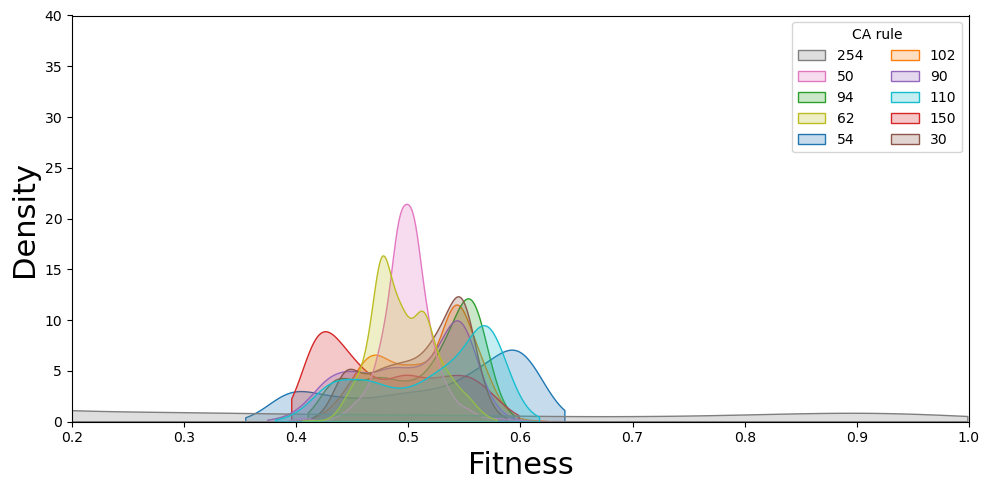

In [38]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

rules=[54,102,94,150,90,30,50,254,62,110]
rule_order=[254,50,94,62,54,102,90,110,150,30]
order=[]
for i in rule_order:
    j=np.where(np.array(rules) == i)[0][0]
    order.append(j)


plt.figure(figsize=(10, 5)) 
for i,f in enumerate(fits):
    sns.kdeplot(f,fill=True,label=rules[i],clip=(min(f), max(f)))

#plt.legend(title="CA rule",ncol=2,loc="upper left")

handles, labels = plt.gca().get_legend_handles_labels()

# Reorder handles and labels
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]

plt.legend(handles, labels,title="CA rule",ncol=2,loc="upper right")

plt.xlabel("Fitness",fontsize=22)
plt.ylabel("Density",fontsize=22)
plt.xlim(0.2,1)
plt.ylim(0,40)
plt.tight_layout()
plt.show()
#plt.savefig("figs/random_grn_fitness.png")